In [146]:
#Import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd 
import os.path 
import numpy as np
import cv2

plt.style.use('fivethirtyeight')

In [147]:
#Load the data
dataset=pd.read_csv(r'C:\Users\duvvu\OneDrive\Desktop\PR\667015_1175090_bundle_archive\train.csv')

In [148]:
print(dataset)


       Image         target
0     96.jpg       manipuri
1    163.jpg  bharatanatyam
2    450.jpg         odissi
3    219.jpg      kathakali
4    455.jpg         odissi
..       ...            ...
359   72.jpg       manipuri
360  253.jpg   mohiniyattam
361  404.jpg      kuchipudi
362   89.jpg       manipuri
363  311.jpg   mohiniyattam

[364 rows x 2 columns]


In [149]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [150]:
images = np.array(pd.read_csv(r'C:\Users\duvvu\OneDrive\Desktop\PR\667015_1175090_bundle_archive\train.csv', usecols = ['Image']))
targets = np.array(pd.read_csv(r'C:\Users\duvvu\OneDrive\Desktop\PR\667015_1175090_bundle_archive\train.csv', usecols = ['target']))

x1=[]
y=[]
datasetpath="C:\\Users\\duvvu\\OneDrive\\Desktop\\PR\\667015_1175090_bundle_archive\\train\\"
for i in range(len(images)):
    x1.append(datasetpath+str(images[i][0]))
for i in range(len(targets)):
    y.append(targets[i][0])
    
y_set = set(y)
y_unique = list(y_set)
print(y_unique)

for i in range(len(y)):
    if y[i]==y_unique[0]:
        y[i]=0
    elif y[i]==y_unique[1]:
        y[i]=1
    elif y[i]==y_unique[2]:
        y[i]=2
    elif y[i]==y_unique[3]:
        y[i]=3
    elif y[i]==y_unique[4]:
        y[i]=4
    elif y[i]==y_unique[5]:
        y[i]=5
    elif y[i]==y_unique[6]:
        y[i]=6
    elif y[i]==y_unique[7]:
        y[i]=7
print(x1)
print(y)


['manipuri', 'kuchipudi', 'bharatanatyam', 'odissi', 'kathak', 'sattriya', 'kathakali', 'mohiniyattam']
['C:\\Users\\duvvu\\OneDrive\\Desktop\\PR\\667015_1175090_bundle_archive\\train\\96.jpg', 'C:\\Users\\duvvu\\OneDrive\\Desktop\\PR\\667015_1175090_bundle_archive\\train\\163.jpg', 'C:\\Users\\duvvu\\OneDrive\\Desktop\\PR\\667015_1175090_bundle_archive\\train\\450.jpg', 'C:\\Users\\duvvu\\OneDrive\\Desktop\\PR\\667015_1175090_bundle_archive\\train\\219.jpg', 'C:\\Users\\duvvu\\OneDrive\\Desktop\\PR\\667015_1175090_bundle_archive\\train\\455.jpg', 'C:\\Users\\duvvu\\OneDrive\\Desktop\\PR\\667015_1175090_bundle_archive\\train\\46.jpg', 'C:\\Users\\duvvu\\OneDrive\\Desktop\\PR\\667015_1175090_bundle_archive\\train\\326.jpg', 'C:\\Users\\duvvu\\OneDrive\\Desktop\\PR\\667015_1175090_bundle_archive\\train\\408.jpg', 'C:\\Users\\duvvu\\OneDrive\\Desktop\\PR\\667015_1175090_bundle_archive\\train\\365.jpg', 'C:\\Users\\duvvu\\OneDrive\\Desktop\\PR\\667015_1175090_bundle_archive\\train\\422.jpg

In [151]:
# Images migh be in different size. In this section I assigning all image at same size of 224*224
img_width = 224
img_height = 224

In [152]:
print(x1[3])
print(y[3])
x2=[]
x=[]

for i in range(len(x1)):
    x.append(cv2.resize(cv2.imread(x1[i]), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
    

print(len(x[0]))


C:\Users\duvvu\OneDrive\Desktop\PR\667015_1175090_bundle_archive\train\219.jpg
6
224


In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = None)

In [154]:
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [155]:
print(y_train_one_hot)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [156]:
print('The one hot label is:',y_train_one_hot[0])

The one hot label is: [0. 0. 1. 0. 0. 0. 0. 0.]


In [157]:
#Normalizing the pixel to values between 0 and 1
x_train=np.divide(x_train,255)
x_test=np.divide(x_test,255)

In [158]:
print(x_train[0])

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.98823529 0.99607843 0.99607843]
  [0.98823529 0.99607843 0.99607843]
  [0.98823529 0.99607843 0.99607843]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.99215686 1.         1.        ]
  [0.99215686 1.         1.        ]
  [0.99215686 1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         0.99607843 1.        ]
  [1.         0.99607843 1.        ]
  [1.         0.99607843 1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.99215686 0.99215686 0.99215686]
  [0.99607843 0.99607843 0.99607843]


In [159]:
#create the models

from keras.applications.vgg16 import VGG16

vggmodel =VGG16(weights='imagenet', include_top=False, input_shape = (224, 224, 3),pooling='max')

vggmodel.trainable = False
model = Sequential([
  vggmodel, 
  Dense(1024, activation='relu'),
  Dropout(0.25),
  Dense(256, activation='relu'),
  Dropout(0.25),
  Dense(8, activation='softmax'),
])
"""
model = Sequential()

#add the first layer
model.add(Conv2D(img_width,(5,5),activation='relu',input_shape=(img_width,img_width,3)))

#add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#add another convolution layer
model.add(Conv2D(img_width,(5,5),activation='relu'))

#add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1024 neurons
model.add(Dense(1024,activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 512 neurons
model.add(Dense(512,activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 256 neurons
model.add(Dense(512,activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))


#Add a layer with 8 neurons
model.add(Dense(8,activation='softmax'))
"""

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

"\nmodel = Sequential()\n\n#add the first layer\nmodel.add(Conv2D(img_width,(5,5),activation='relu',input_shape=(img_width,img_width,3)))\n\n#add a pooling layer\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n#add another convolution layer\nmodel.add(Conv2D(img_width,(5,5),activation='relu'))\n\n#add a pooling layer\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n#Add a flattening layer\nmodel.add(Flatten())\n\n#Add a layer with 1024 neurons\nmodel.add(Dense(1024,activation='relu'))\n\n#Add a drop out layer\nmodel.add(Dropout(0.5))\n\n#Add a layer with 512 neurons\nmodel.add(Dense(512,activation='relu'))\n\n#Add a drop out layer\nmodel.add(Dropout(0.5))\n\n#Add a layer with 256 neurons\nmodel.add(Dense(512,activation='relu'))\n\n#Add a drop out layer\nmodel.add(Dropout(0.5))\n\n\n#Add a layer with 8 neurons\nmodel.add(Dense(8,activation='softmax'))\n"

In [160]:
#compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [161]:
#train the model
hist = model.fit(x_train,y_train_one_hot,
                 batch_size=16,
                 epochs=30,
                 validation_split=0.1)

Train on 261 samples, validate on 30 samples
Epoch 1/30
261/261 [==============================] - 128s 491ms/step - loss: 2.8420 - accuracy: 0.1571 - val_loss: 1.9259 - val_accuracy: 0.3000
Epoch 2/30
261/261 [==============================] - 130s 500ms/step - loss: 1.9250 - accuracy: 0.2299 - val_loss: 1.6912 - val_accuracy: 0.4000
Epoch 3/30
261/261 [==============================] - 132s 506ms/step - loss: 1.7439 - accuracy: 0.3448 - val_loss: 1.5198 - val_accuracy: 0.5000
Epoch 4/30
261/261 [==============================] - 137s 525ms/step - loss: 1.3852 - accuracy: 0.5019 - val_loss: 1.3508 - val_accuracy: 0.6333
Epoch 5/30
261/261 [==============================] - 139s 534ms/step - loss: 1.2891 - accuracy: 0.5019 - val_loss: 1.1123 - val_accuracy: 0.6333
Epoch 6/30
261/261 [==============================] - 139s 533ms/step - loss: 1.0821 - accuracy: 0.6207 - val_loss: 1.1400 - val_accuracy: 0.5667
Epoch 7/30
261/261 [==============================] - 135s 518ms/step - loss: 0

In [162]:
#Evaluate the model using the test data set
model.evaluate(x_test,y_test_one_hot)[1]

73/73 [==============================] - 36s 491ms/step


0.6301369667053223

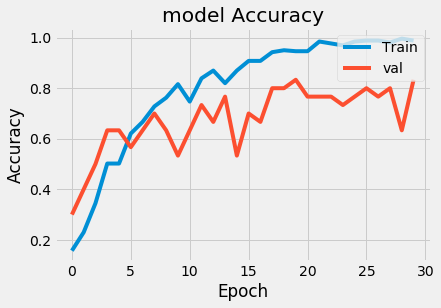

In [163]:
#visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'],loc='upper right')
plt.show()


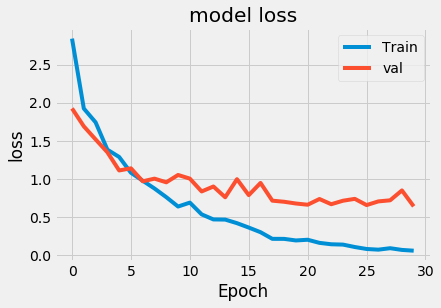

In [164]:
#visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','val'],loc='upper right')
plt.show()

In [190]:
datasetpath="C:\\Users\\duvvu\\OneDrive\\Desktop\\PR\\667015_1175090_bundle_archive\\test\\"

test_image=plt.imread(datasetpath+"216.jpg")

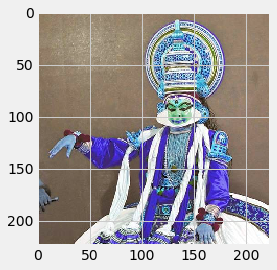

In [191]:
resized_test_image=cv2.resize(cv2.imread(datasetpath+"216.jpg"), (224,224), interpolation=cv2.INTER_CUBIC)
show_resized_image=plt.imshow(resized_test_image)

In [192]:
#Get the model predictions
predictions=model.predict(np.array([resized_test_image]))

#Sort the predictions from least to greatest
list_index=[0,1,2,3,4,5,6,7]
x=predictions

for i in range(8):
    for j in range(8):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            list_index[i],list_index[j]=list_index[j],list_index[i]
            
print(y_unique[list_index[0]])

#show the sorted list
print(list_index)

#prediction
for i in range(7):
    print(y_unique[list_index[i]])



kathakali
[6, 1, 2, 3, 4, 5, 0, 7]
kathakali
kuchipudi
bharatanatyam
odissi
kathak
sattriya
manipuri
